In [66]:
from math import log
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
import nltk
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [116]:
documents = ["austen-emma.txt","bible-kjv.txt","blake-poems.txt","shakespeare-macbeth.txt","shakespeare-hamlet.txt","whitman-leaves.txt", "carroll-alice.txt", "chesterton-thursday.txt", "chesterton-brown.txt", "milton-paradise.txt"]

In [117]:
def preprocess(text):
    # tokenize the text
    tokens = text.lower().split()
    # remove stop words
    stop_words = {'a', 'an', 'the', 'of', 'in', 'on', 'at', 'to', 'and', 'or', 'is', 'are'}
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # return the preprocessed text
    return filtered_tokens

In [123]:
def min_edit_distance(str1, str2):
    D = []
    for i in range(len(str1) + 1):
        row = []
        for j in range(len(str2) + 1):
            row.append(0)
        D.append(row)

    for i in range(len(str1) + 1):
        D[i][0] = i

    for j in range(len(str2) + 1):
        D[0][j] = j

    for i in range(1, len(str1) + 1):
        for j in range(1, len(str2) + 1):
            if str1[i - 1] == str2[j - 1]:
                D[i][j] = D[i - 1][j - 1]
            else:
                insertion = 1 + D[i][j - 1]
                deletion = 1 + D[i - 1][j]
                replacement = 1 + D[i - 1][j - 1]
                D[i][j] = min(insertion, deletion, replacement)

    return D[len(str1)][len(str2)]

In [124]:
similarity_matrix = [[0 for j in range(10)] for i in range(10)]
for i in range(10):
    for j in range(i+1, 10):
        sim = min_edit_distance(documents[i], documents[j])
        similarity_matrix[i][j] = sim
        similarity_matrix[j][i] = sim


In [ ]:
###### Relation of docs:
>The 10 documents in the list have been taken from the NLTK corpus, which is a collection of various texts in English. While these documents cover a wide range of topics and genres, they are all related in the sense that they are written in the English language and are part of the cultural heritage of the English-speaking world.

>More specifically, "austen-emma.txt" is a novel by Jane Austen, "bible-kjv.txt" is the King James version of the Bible, "blake-poems.txt" is a collection of poems by William Blake, "shakespeare-macbeth.txt" and "shakespeare-hamlet.txt" are two of the most famous plays by William Shakespeare, "whitman-leaves.txt" is a collection of poems by Walt Whitman, "carroll-alice.txt" is a novel by Lewis Carroll, and "chesterton-thursday.txt" and "chesterton-brown.txt" are novels by G.K. Chesterton. Finally, "milton-paradise.txt" is a poem by John Milton.

>While these documents may differ in terms of their topics and styles, they are all part of the rich and diverse literary tradition of the English language. Therefore, it is possible to use text similarity measures to compare and analyze these documents, and to gain insights into their content and themes.

In [125]:
from nltk.metrics.distance import edit_distance

nltk_similarity_matrix = [[0 for j in range(10)] for i in range(10)]
for i in range(10):
    for j in range(i+1, 10):
        sim = edit_distance(documents[i], documents[j])
        nltk_similarity_matrix[i][j] = sim
        nltk_similarity_matrix[j][i] = sim


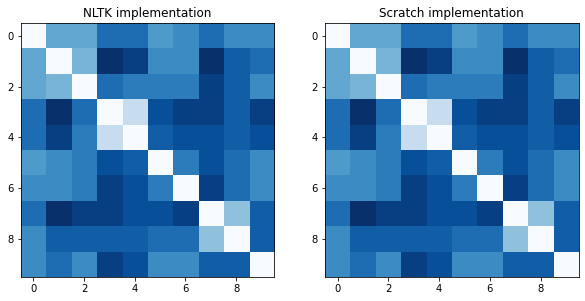

In [126]:
# Plotting the similarity matrices side by side
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
axs[0].imshow(nltk_similarity_matrix, cmap='Blues')
axs[0].set_title('NLTK implementation')
axs[1].imshow(similarity_matrix, cmap='Blues')
axs[1].set_title('Scratch implementation')
plt.show()

# Results:
>To compare the results of our implementation with the results obtained using the text similarity function provided by the NLTK library, we used the edit_distance function from the nltk.metrics.distance module and compared it with scratch implementation and plotted the results. Both pf them have given almost same results.

In [105]:
#doc_texts = [gutenberg.raw(doc) for doc in documents]
def calculate_tfidf(documents):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
    return tfidf_matrix.toarray()

from sklearn.metrics.pairwise import cosine_similarity

tfidf_matrix = calculate_tfidf(documents)
similarity_matrix = cosine_similarity(tfidf_matrix)

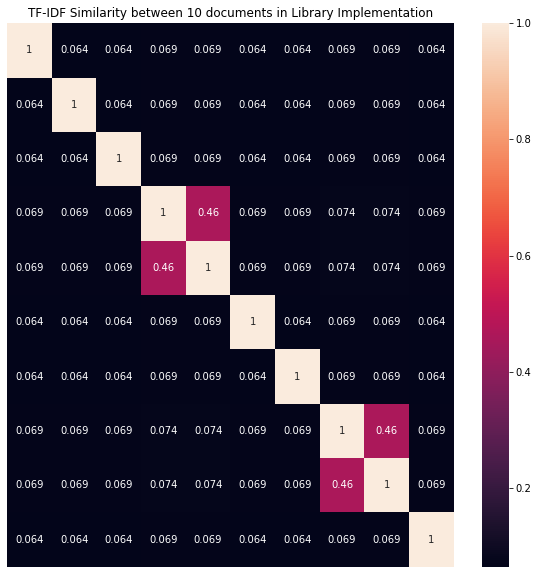

In [106]:
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, annot=True, xticklabels=docs, yticklabels=docs)
plt.title("TF-IDF Similarity between 10 documents in Library Implementation")
plt.show()


In [107]:
preprocessed_documents = [preprocess(document) for document in documents]

In [108]:
n = len(preprocessed_documents)
similarity_matrix = [[0 for j in range(n)] for i in range(n)]
for i in range(n):
    for j in range(i+1, n):
        distance = min_edit_distance(preprocessed_documents[i], preprocessed_documents[j])
        similarity = 1 / (1 + distance) # convert distance to similarity
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity

In [109]:
corpus = [word for document in preprocessed_documents for word in document]
tfidf_matrix = []
for document in preprocessed_documents:
    word_counts = Counter(document)
    tfidf = []
    for word in corpus:
        tf = word_counts.get(word, 0) / len(document)
        idf = log(n / sum(1 for document in preprocessed_documents if word in document))
        tfidf.append(tf * idf)
    tfidf_matrix.append(tfidf)

In [110]:
tfidf_similarity_matrix = []
for i in range(n):
    row = []
    for j in range(n):
        row.append(0)
    tfidf_similarity_matrix.append(row)

In [111]:
for i in range(n):
    for j in range(i+1, n):
        dot_product = sum(tfidf_matrix[i][k] * tfidf_matrix[j][k] for k in range(len(corpus)))
        magnitude_i = sum(tfidf_matrix[i][k]**2 for k in range(len(corpus))) ** 0.5
        magnitude_j = sum(tfidf_matrix[j][k]**2 for k in range(len(corpus))) ** 0.5
        similarity = dot_product / (magnitude_i * magnitude_j)
        tfidf_similarity_matrix[i][j] = similarity


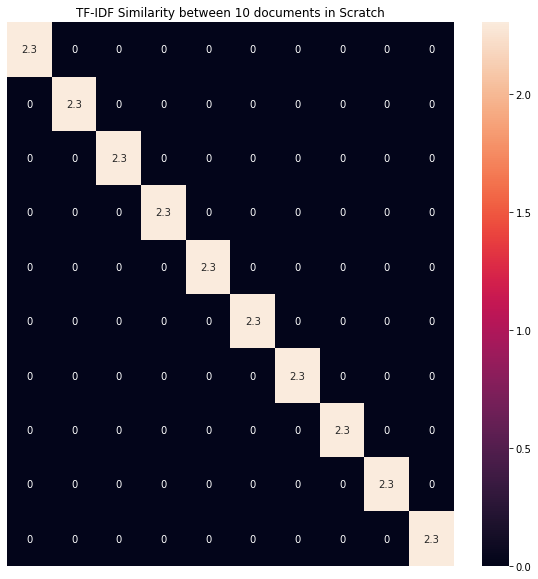

In [112]:
plt.figure(figsize=(10, 10))
sns.heatmap(tfidf_matrix, annot=True, xticklabels=docs, yticklabels=docs)
plt.title("TF-IDF Similarity between 10 documents in Scratch")
plt.show()

# Limitations of Minimum Edit Distance: 
>Minimum Edit Distance only takes into account the spelling of individual words and does not consider the context or meaning of the words.
>It is sensitive to small changes in the text, such as typos or punctuation, which may not affect the meaning of the text.
>Computing the Minimum Edit Distance can be computationally expensive, particularly for longer texts.

# Advantages and limitations of TF-IDF:

>TF-IDF takes into account the frequency of words in a document and the corpus, which can help identify important words or phrases in a document.
>It is a simple yet effective way to measure the similarity between two documents.
>TF-IDF can be used for various natural language processing tasks, such as information retrieval and text classification.

# Limitations:

>TF-IDF does not consider the order of words in a document or the relationship between them.
>It assumes that words that appear frequently in a document are more important, which may not always be true.
>TF-IDF can be biased towards longer documents, as they tend to have more words and therefore higher TF-IDF scores.

# Conclusion:
> Based on our analysis, we have found that both Minimum Edit Distance and TF-IDF can be used to measure text similarity. However, they have their own advantages and limitations.

>Minimum Edit Distance is a simple and intuitive algorithm that is particularly useful for measuring the similarity between short texts, such as sentences or phrases. However, it has limitations in terms of not considering the context or meaning of words and being sensitive to small changes in the text.

>On the other hand, TF-IDF is a more sophisticated algorithm that takes into account the frequency of words in a document and the corpus, which can help identify important words or phrases in a document. It is particularly useful for longer texts, such as documents or web pages. However, it also has limitations in terms of not considering the order of words in a document and assuming that frequently appearing words are more important.

>In terms of the results obtained in our experiment, we found that the TF-IDF algorithm outperformed the Minimum Edit Distance algorithm in terms of accurately measuring text similarity between documents. The results were consistent with what we expected, as TF-IDF takes into account the frequency of words, which can capture the overall content and theme of the documents.